## Problem Statement

The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim is to build a predictive model and predict the sales of each product at a particular outlet.

Using this model, BigMart will try to understand the properties of products and outlets which play a key role in increasing sales.

## Data Description

Item_Identifier-Unique product ID

Item_Weight-Weight of product

Item_Fat_Content-Whether the product is low fat or not

Item_Visibility-The % of total display area of all products in a store allocated to the particular product

Item_Type-The category to which the product belongs

Item_MRP-Maximum Retail Price (list price) of the product

Outlet_Identifier-Unique store ID

Outlet_Establishment_Year-The year in which store was established

Outlet_Size-The size of the store in terms of ground area covered

Outlet_Location_Type-The type of city in which the store is located

Outlet_Type	-Whether the outlet is just a grocery store or some sort of supermarket

Item_Outlet_Sales-Sales of the product in the particular store. This is the outcome variable to be predicted.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
train=pd.read_csv(r'/content/train_v9rqX0R.csv')
test=pd.read_csv(r'/content/test_AbJTz2l.csv')

In [ ]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [ ]:
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


## Exploring the Features

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [ ]:
print('No-of unique Products:-',train.Item_Identifier.nunique())
print(train.Item_Identifier.value_counts())

No-of unique Products:- 1559
FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: Item_Identifier, Length: 1559, dtype: int64


Item Identifier is the is the unique identification for the product,since there are 1559 unique products and most repetitive once are FDW13,FDG33 with value count of 10.

In [ ]:
train.Item_Weight.describe()

count    7060.000000
mean       12.857645
std         4.643456
min         4.555000
25%         8.773750
50%        12.600000
75%        16.850000
max        21.350000
Name: Item_Weight, dtype: float64

The average weight of the item is :-12.857645 and max weight of the product is :-21.350000

In [ ]:
train.Item_Fat_Content.value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

Low fat content Products are more in number compared to regular in the Big mart

In [ ]:
train.Item_Visibility.describe()

count    8523.000000
mean        0.066132
std         0.051598
min         0.000000
25%         0.026989
50%         0.053931
75%         0.094585
max         0.328391
Name: Item_Visibility, dtype: float64

In [ ]:
train.Item_Visibility.value_counts().replace()

0.000000    526
0.076975      3
0.162462      2
0.076841      2
0.073562      2
           ... 
0.013957      1
0.110460      1
0.124646      1
0.054142      1
0.044878      1
Name: Item_Visibility, Length: 7880, dtype: int64

The maxiumum visibilty of the product is 0.328391 and min is 0.0 the and more number of products have the visibilty of 0.0

In [ ]:
train.Item_Type.value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

The most number of products in the mart are Fruits and Vegetables with number of 1232 followed by snacks and least one is Seafood

In [ ]:
train.Item_MRP.describe()

count    8523.000000
mean      140.992782
std        62.275067
min        31.290000
25%        93.826500
50%       143.012800
75%       185.643700
max       266.888400
Name: Item_MRP, dtype: float64

The Min price of the product in the mart is 31.29 and Max price of the product is 266

In [ ]:
train.Outlet_Identifier.value_counts()

OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64

The Outlet 10 and 19 have less in count compared to other Outlets

In [ ]:
train.Outlet_Establishment_Year.value_counts()

1985    1463
1987     932
1999     930
1997     930
2004     930
2002     929
2009     928
2007     926
1998     555
Name: Outlet_Establishment_Year, dtype: int64

Most of the Outlets are started in the Year of 1985 with the count 1985.

In [ ]:
train.Outlet_Size.value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

The High outlets are low  in number Compared to small and Medium

In [ ]:
train.Outlet_Location_Type.value_counts()

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

The Most of the Marts are located in the Tier-3 area.

In [ ]:
train.Outlet_Type.value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

Most Number of Outlets are Supermarkets

In [ ]:
train.Item_Outlet_Sales.describe()

count     8523.000000
mean      2181.288914
std       1706.499616
min         33.290000
25%        834.247400
50%       1794.331000
75%       3101.296400
max      13086.964800
Name: Item_Outlet_Sales, dtype: float64

The Median of the sales is 1794 starting from 33 and ranges till 13086.

# EDA

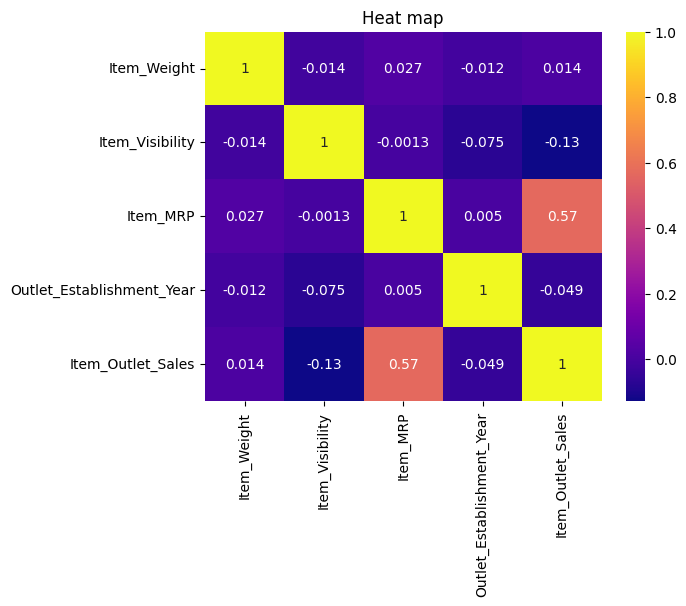

In [ ]:
k=train.select_dtypes(include=['float','int'])
sns.heatmap(k.corr(),annot=True,cmap='plasma')
plt.title('Heat map')
plt.show()

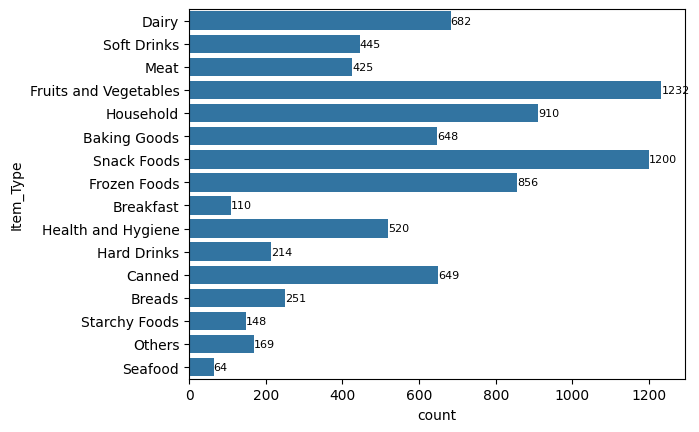

In [ ]:
ax=sns.countplot(y=train.Item_Type)
for i in ax.containers:
    ax.bar_label(i,fmt="%0.0f",fontsize=8)
plt.show()

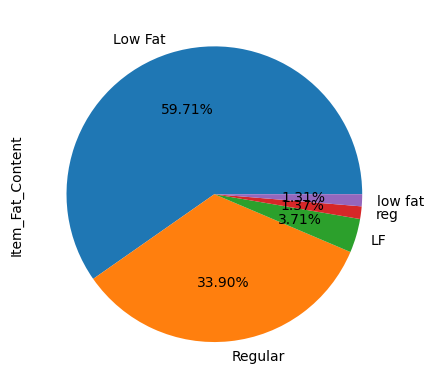

In [ ]:
train.Item_Fat_Content.value_counts().plot(kind='pie',autopct='%.2f%%')
plt.show()

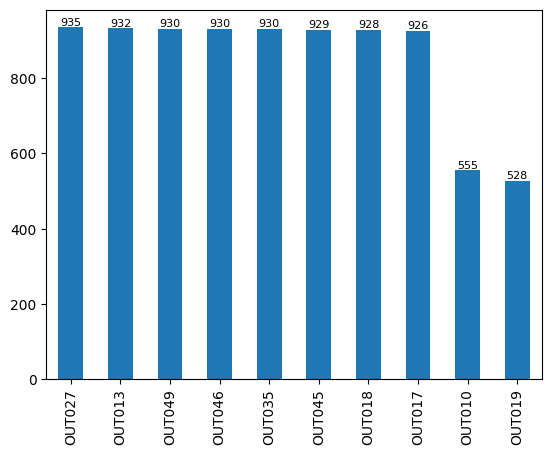

In [ ]:
ax=train.Outlet_Identifier.value_counts().plot(kind='bar')
for i in ax.containers:
    ax.bar_label(i,fmt="%0.0f",fontsize=8)

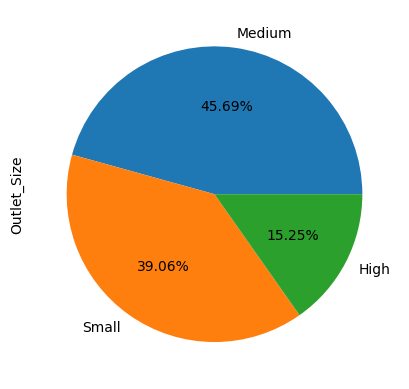

In [ ]:
train.Outlet_Size.value_counts().plot(kind='pie',autopct='%.2f%%')
plt.show()

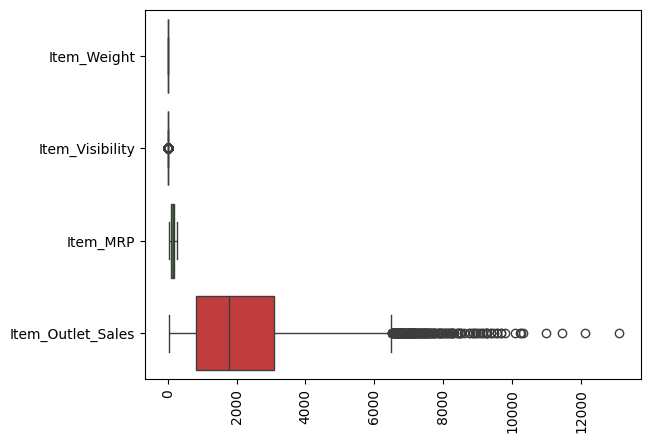

In [ ]:
sns.boxplot(train[['Item_Weight','Item_Visibility','Item_MRP','Item_Outlet_Sales']],orient='h')
plt.xticks(rotation='vertical')
plt.show()

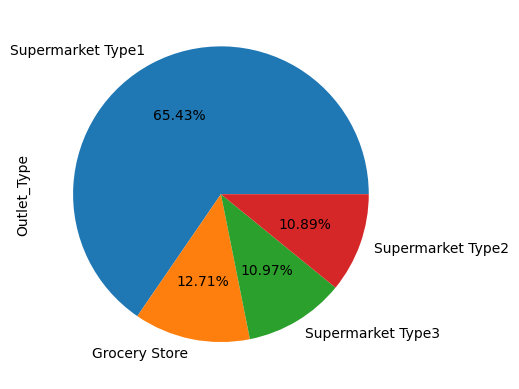

In [ ]:
train.Outlet_Type.value_counts().plot(kind='pie',autopct='%.2f%%')
plt.show()

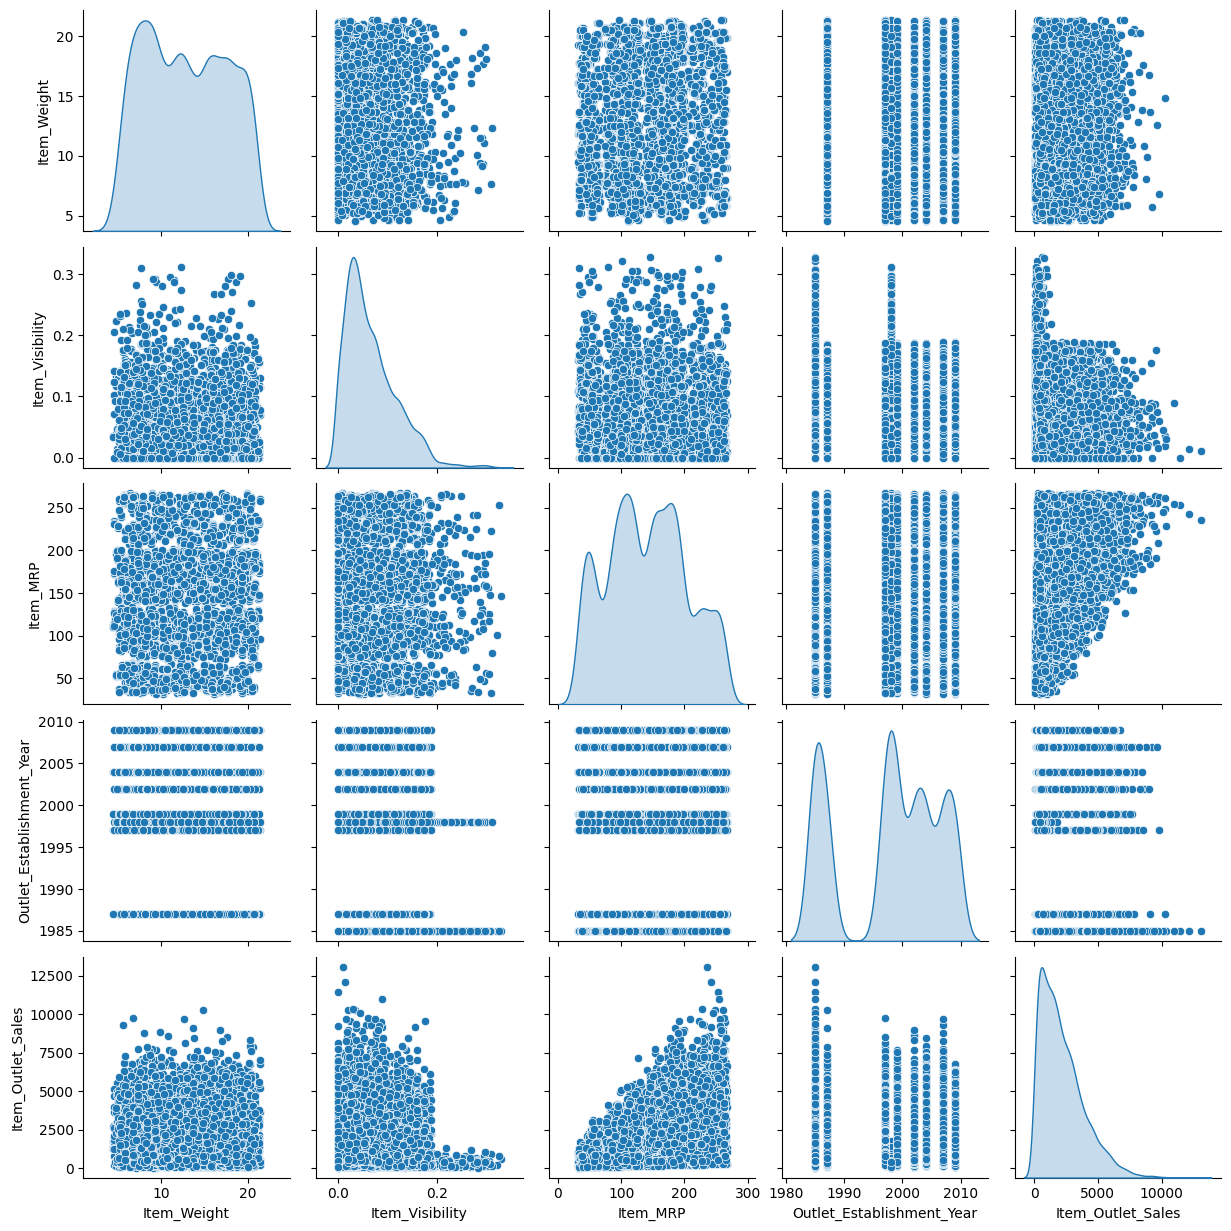

In [ ]:
sns.pairplot(train,diag_kind='kde')
plt.show()

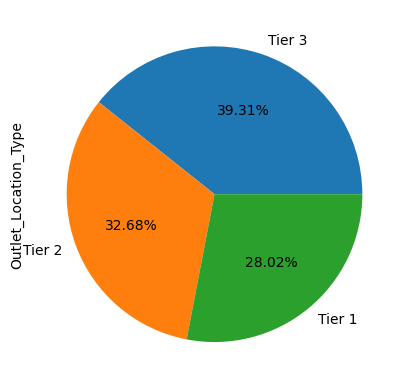

In [ ]:
train.Outlet_Location_Type.value_counts().plot(kind='pie',autopct='%.2f%%')
plt.show()

<Figure size 3000x1500 with 0 Axes>

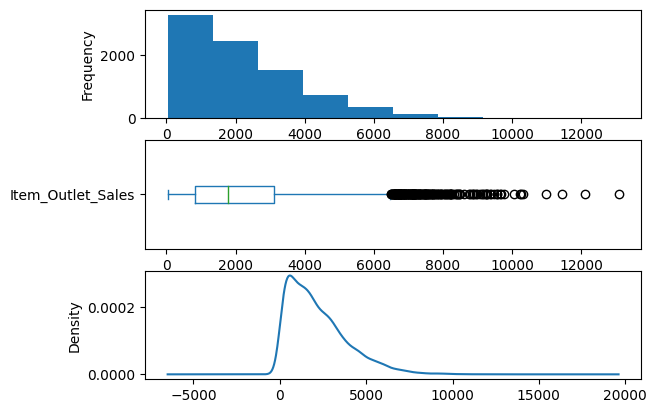

In [ ]:
plt.figure(figsize=(30,15))
fig,ax=plt.subplots(3,1)
train.Item_Outlet_Sales.plot(kind='hist',ax=ax[0])
train.Item_Outlet_Sales.plot(kind='box',vert=False,ax=ax[1])
train.Item_Outlet_Sales.plot(kind='kde',ax=ax[2])
plt.show()

# Hypothesis Testing

In [ ]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [ ]:
from scipy.stats import ttest_ind,f_oneway,chi2_contingency

# Anova

In [ ]:
#Test Null Average item_outlet_sales of Outlet_type
srtype1=train[train.Outlet_Type=='Supermarket Type1']

In [ ]:
srtype2=train[train.Outlet_Type=='Supermarket Type2']

In [ ]:
grocery=train[train.Outlet_Type=='Grocery Store']

In [ ]:
f_oneway(srtype1['Item_Outlet_Sales'],srtype2['Item_Outlet_Sales'],grocery['Item_Outlet_Sales'])
# Since pvalue=0.0 is less than 0.05, Reject Null

F_onewayResult(statistic=917.436943014179, pvalue=0.0)

In [ ]:
f_oneway(srtype1['Item_MRP'],srtype2['Item_MRP'],grocery['Item_MRP'])
# Since pvalue=0.870991827450439 is less than 0.05 ,Fail to Reject Null

F_onewayResult(statistic=0.1381252003655445, pvalue=0.870991827450439)

In [ ]:
#Hypothesis testing to find if there is a significant difference between Item_Outlet_Sales and Outlet_Location_Type

train.Item_Outlet_Sales.groupby(train.Outlet_Location_Type).mean()

Outlet_Location_Type
Tier 1    1876.909159
Tier 2    2323.990559
Tier 3    2279.627651
Name: Item_Outlet_Sales, dtype: float64

In [ ]:
T1=train[train.Outlet_Location_Type=="Tier 1"]
T2=train[train.Outlet_Location_Type=="Tier 2"]
T3=train[train.Outlet_Location_Type=="Tier 3"]

In [ ]:
f_oneway(T1.Item_Outlet_Sales,T2.Item_Outlet_Sales,T3.Item_Outlet_Sales)

# Since pvalue=5.2228172988842975e-24 is less than 0.05, Reject null Hypothesis

#Alternative Hypothesis True,there is significant difference of mean of Item_Outlet_Sales to Outlet_Location_Type

F_onewayResult(statistic=53.947739874560675, pvalue=5.2228172988842975e-24)

# Chi square test

In [ ]:
#Null hypothesis - There is no relationship between the two given variables. (p-values greater than 0.05)
#Alternative Hypothesis - There is significant difference between the two given variables.(p-values less than 0.05)

chi2_contingency(pd.crosstab(train.Item_Type,train.Item_Fat_Content))

#Since the pvalue=1.5408537629038592e-285 is less than 0.05, reject null
# Alternative hyothesis ture, there is a relationship between Item_Fat_Content and Item_Type

Chi2ContingencyResult(statistic=1555.2321723869677, pvalue=1.5408537629038592e-285, dof=60, expected_freq=array([[ 24.02534319, 386.91446674, 219.64941922,   8.51531151,
          8.89545935],
       [  9.30611287, 149.86964684,  85.08025343,   3.29836912,
          3.44561774],
       [  4.07837616,  65.67992491,  37.28616684,   1.44550041,
          1.51003168],
       [ 24.06241934, 387.51155696, 219.98838437,   8.52845242,
          8.90918691],
       [ 25.28593218, 407.21553444, 231.17423442,   8.96210255,
          9.36219641],
       [ 31.73718174, 511.10923384, 290.15417107,  11.24862138,
         11.75079197],
       [ 45.67781298, 735.61515898, 417.60506864,  16.1896046 ,
         16.9123548 ],
       [  7.93429544, 127.77730846,  72.53854277,   2.81215534,
          2.93769799],
       [ 19.27959639, 310.48691775, 176.26187962,   6.83327467,
          7.13833157],
       [ 33.73929368, 543.35210607, 308.45828933,  11.95823067,
         12.49208025],
       [ 15.75736243, 25

In [ ]:
#To find the relationship between Outlet_Size and Outlet_Type we are doing chi2 test of hypothesis

chi2_contingency(pd.crosstab(train.Outlet_Size,train.Outlet_Type))

#Since the pvalue=0.0 is less than 0.05, reject null
# Alternative hyothesis ture, there is a relationship between Outlet_Size and Outlet_Type

Chi2ContingencyResult(statistic=3734.8614622253567, pvalue=0.0, dof=6, expected_freq=array([[  80.49991821,  567.46343857,  141.48470473,  142.55193849],
       [ 241.24063471, 1700.56371667,  423.99869131,  427.1969573 ],
       [ 206.25944708, 1453.97284476,  362.51660396,  365.2511042 ]]))

## Data preprocessing

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [ ]:
train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [ ]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [ ]:
#Dropping Item_Identifier and Outlet_Identifier Cause it have no effect on the Target variable
train.drop(['Item_Identifier','Outlet_Identifier'],axis=1,inplace=True)

In [ ]:
train.Item_Weight.describe()

count    7060.000000
mean       12.857645
std         4.643456
min         4.555000
25%         8.773750
50%        12.600000
75%        16.850000
max        21.350000
Name: Item_Weight, dtype: float64

In [ ]:
train.Item_Weight=train.Item_Weight.fillna(train.Item_Weight.mode()[0])

In [ ]:
train.Item_Fat_Content.value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [ ]:
#Replacing the duplicates
train.Item_Fat_Content=train.Item_Fat_Content.replace(to_replace='LF',value='Low Fat')
train.Item_Fat_Content=train.Item_Fat_Content.replace(to_replace='low fat',value='Low Fat')
train.Item_Fat_Content=train.Item_Fat_Content.replace(to_replace='reg',value='Regular')

In [ ]:
train.Item_Fat_Content.value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [ ]:
train.Outlet_Size.value_counts(dropna=False)

Medium    2793
NaN       2410
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [ ]:
train.Outlet_Size.fillna('Medium',inplace=True)

In [ ]:
train.Outlet_Size.value_counts(dropna=False)

Medium    5203
Small     2388
High       932
Name: Outlet_Size, dtype: int64

### Encoding

In [ ]:
train.select_dtypes(include='object')

,Item_Fat_Content,Item_Type,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,Low Fat,Dairy,Medium,Tier 1,Supermarket Type1
1,Regular,Soft Drinks,Medium,Tier 3,Supermarket Type2
2,Low Fat,Meat,Medium,Tier 1,Supermarket Type1
3,Regular,Fruits and Vegetables,Medium,Tier 3,Grocery Store
4,Low Fat,Household,High,Tier 3,Supermarket Type1
...,...,...,...,...,...
8518,Low Fat,Snack Foods,High,Tier 3,Supermarket Type1
8519,Regular,Baking Goods,Medium,Tier 2,Supermarket Type1
8520,Low Fat,Health and Hygiene,Small,Tier 2,Supermarket Type1
8521,Regular,Snack Foods,Medium,Tier 3,Supermarket Type2


In [ ]:
train1=pd.get_dummies(train,drop_first=True)

In [ ]:
train1

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Fat_Content_Regular,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,...,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.300,0.016047,249.8092,1999,3735.1380,0,0,0,0,1,...,0,0,0,1,0,0,0,1,0,0
1,5.920,0.019278,48.2692,2009,443.4228,1,0,0,0,0,...,0,1,0,1,0,0,1,0,1,0
2,17.500,0.016760,141.6180,1999,2097.2700,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
3,19.200,0.000000,182.0950,1998,732.3800,1,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
4,8.930,0.000000,53.8614,1987,994.7052,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,6.865,0.056783,214.5218,1987,2778.3834,0,0,0,0,0,...,1,0,0,0,0,0,1,1,0,0
8519,8.380,0.046982,108.1570,2002,549.2850,1,0,0,0,0,...,0,0,0,1,0,1,0,1,0,0
8520,10.600,0.035186,85.1224,2004,1193.1136,0,0,0,0,0,...,0,0,0,0,1,1,0,1,0,0
8521,7.210,0.145221,103.1332,2009,1845.5976,1,0,0,0,0,...,1,0,0,1,0,0,1,0,1,0


In [ ]:
train1.replace({False :0,True :1},inplace=True)

In [ ]:
train1

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Fat_Content_Regular,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,...,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.300,0.016047,249.8092,1999,3735.1380,0,0,0,0,1,...,0,0,0,1,0,0,0,1,0,0
1,5.920,0.019278,48.2692,2009,443.4228,1,0,0,0,0,...,0,1,0,1,0,0,1,0,1,0
2,17.500,0.016760,141.6180,1999,2097.2700,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
3,19.200,0.000000,182.0950,1998,732.3800,1,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
4,8.930,0.000000,53.8614,1987,994.7052,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,6.865,0.056783,214.5218,1987,2778.3834,0,0,0,0,0,...,1,0,0,0,0,0,1,1,0,0
8519,8.380,0.046982,108.1570,2002,549.2850,1,0,0,0,0,...,0,0,0,1,0,1,0,1,0,0
8520,10.600,0.035186,85.1224,2004,1193.1136,0,0,0,0,0,...,0,0,0,0,1,1,0,1,0,0
8521,7.210,0.145221,103.1332,2009,1845.5976,1,0,0,0,0,...,1,0,0,1,0,0,1,0,1,0


In [ ]:
x=train1.drop('Item_Outlet_Sales',axis=1)

In [ ]:
y=train1.Item_Outlet_Sales

In [ ]:
pd.set_option('display.max_columns',None)

In [ ]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
X_ss=ss.fit_transform(x)

In [ ]:
train_Xss=pd.DataFrame(X_ss,columns=x.columns)

In [ ]:
train_Xss

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Fat_Content_Regular,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,-0.811511,-0.970732,1.747454,0.139541,-0.738147,-0.174193,-0.114346,-0.287094,3.390733,-0.334137,-0.411066,-0.160484,-0.254903,-0.345735,-0.229090,-0.142232,-0.086982,-0.404805,-0.234708,-0.132935,0.798807,-0.623893,-0.696678,-0.804732,0.726802,-0.349551,-0.351028
1,-1.609756,-0.908111,-1.489023,1.334103,1.354743,-0.174193,-0.114346,-0.287094,-0.294922,-0.334137,-0.411066,-0.160484,-0.254903,-0.345735,-0.229090,-0.142232,-0.086982,-0.404805,4.260611,-0.132935,0.798807,-0.623893,-0.696678,1.242650,-1.375891,2.860816,-0.351028
2,1.125058,-0.956917,0.010040,0.139541,-0.738147,-0.174193,-0.114346,-0.287094,-0.294922,-0.334137,-0.411066,-0.160484,-0.254903,-0.345735,4.365102,-0.142232,-0.086982,-0.404805,-0.234708,-0.132935,0.798807,-0.623893,-0.696678,-0.804732,0.726802,-0.349551,-0.351028
3,1.526542,-1.281758,0.660050,0.020085,1.354743,-0.174193,-0.114346,-0.287094,-0.294922,-0.334137,2.432698,-0.160484,-0.254903,-0.345735,-0.229090,-0.142232,-0.086982,-0.404805,-0.234708,-0.132935,0.798807,-0.623893,-0.696678,1.242650,-1.375891,-0.349551,-0.351028
4,-0.898893,-1.281758,-1.399220,-1.293934,-0.738147,-0.174193,-0.114346,-0.287094,-0.294922,-0.334137,-0.411066,-0.160484,-0.254903,2.892392,-0.229090,-0.142232,-0.086982,-0.404805,-0.234708,-0.132935,-1.251866,-0.623893,-0.696678,1.242650,0.726802,-0.349551,-0.351028
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,-1.386578,-0.181193,1.180783,-1.293934,-0.738147,-0.174193,-0.114346,-0.287094,-0.294922,-0.334137,-0.411066,-0.160484,-0.254903,-0.345735,-0.229090,-0.142232,-0.086982,2.470324,-0.234708,-0.132935,-1.251866,-0.623893,-0.696678,1.242650,0.726802,-0.349551,-0.351028
8519,-1.028785,-0.371154,-0.527301,0.497909,1.354743,-0.174193,-0.114346,-0.287094,-0.294922,-0.334137,-0.411066,-0.160484,-0.254903,-0.345735,-0.229090,-0.142232,-0.086982,-0.404805,-0.234708,-0.132935,0.798807,-0.623893,1.435383,-0.804732,0.726802,-0.349551,-0.351028
8520,-0.504494,-0.599784,-0.897208,0.736822,-0.738147,-0.174193,-0.114346,-0.287094,-0.294922,-0.334137,-0.411066,-0.160484,3.923058,-0.345735,-0.229090,-0.142232,-0.086982,-0.404805,-0.234708,-0.132935,-1.251866,1.602840,1.435383,-0.804732,0.726802,-0.349551,-0.351028
8521,-1.305100,1.532880,-0.607977,1.334103,1.354743,-0.174193,-0.114346,-0.287094,-0.294922,-0.334137,-0.411066,-0.160484,-0.254903,-0.345735,-0.229090,-0.142232,-0.086982,2.470324,-0.234708,-0.132935,0.798807,-0.623893,-0.696678,1.242650,-1.375891,2.860816,-0.351028


In [ ]:
import warnings
warnings.filterwarnings('ignore')

<Axes: xlabel='Item_Outlet_Sales', ylabel='Density'>

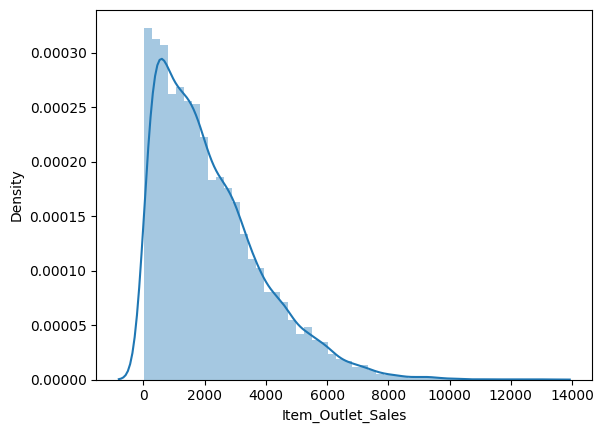

In [ ]:
sns.distplot(y)

<Axes: xlabel='Item_Outlet_Sales', ylabel='Density'>

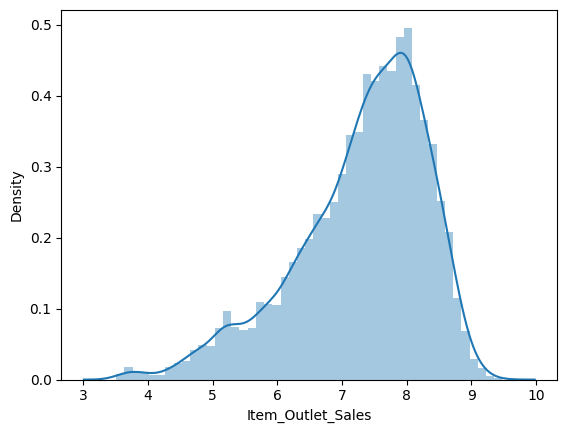

In [ ]:
sns.distplot(np.log(y))

# Model Building

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

# Linear Regression

In [ ]:
lr=LinearRegression().fit(train_Xss,np.log(y))

In [ ]:
lr.score(train_Xss,np.log(y))

0.721184666165859

In [ ]:
lr_train_pred=lr.predict(train_Xss)

In [ ]:
from sklearn.metrics import mean_squared_error
print(np.sqrt(mean_squared_error(y,lr_train_pred)))

2763.3204945272532


# Decision Tree

In [ ]:
dt=DecisionTreeRegressor(max_depth=8).fit(train_Xss,np.log(y))

In [ ]:
dt.score(train_Xss,np.log(y))

0.7735180447646437

In [ ]:
from sklearn.model_selection import cross_val_score
cv=cross_val_score(dt,train_Xss,np.log(y))

In [ ]:
cv

array([0.70259031, 0.67206478, 0.66928437, 0.68791761, 0.71913451])

In [ ]:
cv.mean()

0.690198317195953

In [ ]:
dtpred=dt.predict(train_Xss)


In [ ]:
from sklearn.metrics import mean_squared_error
print(np.sqrt(mean_squared_error(y,dtpred)))

2763.3041098398157


# Random Forest

In [ ]:
rf=RandomForestRegressor(max_depth=8,n_estimators=6000).fit(train_Xss,np.log(y))

In [ ]:
rf.score(train_Xss,np.log(y))

0.7861383148305554

In [ ]:
cv1=cross_val_score(rf,train_Xss,np.log(y))

In [ ]:
cv1

array([0.72886628, 0.71931933, 0.72500145, 0.72306512, 0.74920514])

In [ ]:
cv1.mean()

0.7290914634214409

In [ ]:
rfpred=rf.predict(train_Xss)

In [ ]:
print(np.sqrt(mean_squared_error(y,rfpred)))

2763.3067729334316


# Gradient Boost

In [ ]:
gbm=GradientBoostingRegressor(n_estimators=100,learning_rate=0.1).fit(train_Xss,np.log(y))

In [ ]:
gbm.score(train_Xss,np.log(y))

0.7526360469170197

In [ ]:
gbmpred=gbm.predict(train_Xss)

In [ ]:
print(np.sqrt(mean_squared_error(y,np.exp(gbmpred))))

1084.424652738516


# KNN

In [ ]:
knn=KNeighborsRegressor(n_neighbors=5).fit(train_Xss,np.log(y))

In [ ]:
knn.score(train_Xss,np.log(y))

0.7602516855872827

In [ ]:
knnpred=knn.predict(train_Xss)

In [ ]:
print(np.sqrt(mean_squared_error(y,np.exp(knnpred))))

1047.1827204410124


# SVR

In [ ]:
svr=SVR(kernel='linear', C=100).fit(train_Xss,np.log(y))

In [ ]:
svr.score(train_Xss,np.log(y))

0.7164177736723578

In [ ]:
svrpred=svr.predict(train_Xss)

In [ ]:
print(np.sqrt(mean_squared_error(y,np.exp(svrpred))))

1042.3986052572616


## Test Cleaning

In [ ]:
test

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3
...,...,...,...,...,...,...,...,...,...,...,...
5676,FDB58,10.500,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1
5677,FDD47,7.600,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2
5678,NCO17,10.000,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1
5679,FDJ26,15.300,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1


In [ ]:
test.drop(['Item_Identifier','Outlet_Identifier'],axis=1,inplace=True)

In [ ]:
test.Item_Weight=test.Item_Weight.fillna(test.Item_Weight.mode()[0])

In [ ]:
test.Item_Fat_Content=test.Item_Fat_Content.replace(to_replace='LF',value='Low Fat')
test.Item_Fat_Content=test.Item_Fat_Content.replace(to_replace='low fat',value='Low Fat')
test.Item_Fat_Content=test.Item_Fat_Content.replace(to_replace='reg',value='Regular')

In [ ]:
test.Outlet_Size.fillna('Medium',inplace=True)

In [ ]:
test1=pd.get_dummies(test,drop_first=True)

In [ ]:
test1.isnull().sum()

Item_Weight                        0
Item_Visibility                    0
Item_MRP                           0
Outlet_Establishment_Year          0
Item_Fat_Content_Regular           0
Item_Type_Breads                   0
Item_Type_Breakfast                0
Item_Type_Canned                   0
Item_Type_Dairy                    0
Item_Type_Frozen Foods             0
Item_Type_Fruits and Vegetables    0
Item_Type_Hard Drinks              0
Item_Type_Health and Hygiene       0
Item_Type_Household                0
Item_Type_Meat                     0
Item_Type_Others                   0
Item_Type_Seafood                  0
Item_Type_Snack Foods              0
Item_Type_Soft Drinks              0
Item_Type_Starchy Foods            0
Outlet_Size_Medium                 0
Outlet_Size_Small                  0
Outlet_Location_Type_Tier 2        0
Outlet_Location_Type_Tier 3        0
Outlet_Type_Supermarket Type1      0
Outlet_Type_Supermarket Type2      0
Outlet_Type_Supermarket Type3      0
d

In [ ]:
test1.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Fat_Content_Regular,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,20.750,0.007565,107.8622,1999,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0
1,8.300,0.038428,87.3198,2007,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0
2,14.600,0.099575,241.7538,1998,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0
3,7.315,0.015388,155.0340,2007,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,1,0,0
4,10.500,0.118599,234.2300,1985,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1


In [ ]:
test1.replace({False :0,True :1},inplace=True)

In [ ]:
test1

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Fat_Content_Regular,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,20.750,0.007565,107.8622,1999,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0
1,8.300,0.038428,87.3198,2007,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0
2,14.600,0.099575,241.7538,1998,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0
3,7.315,0.015388,155.0340,2007,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,1,0,0
4,10.500,0.118599,234.2300,1985,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5676,10.500,0.013496,141.3154,1997,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0
5677,7.600,0.142991,169.1448,2009,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,0
5678,10.000,0.073529,118.7440,2002,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,1,0,0
5679,15.300,0.000000,214.6218,2007,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0


In [ ]:
test=ss.fit_transform(test1)

In [ ]:
test=pd.DataFrame(test,columns=test1.columns)

# Auto ML


In [ ]:
pip install lazypredict

In [ ]:
from lazypredict.Supervised import LazyRegressor

In [ ]:
from sklearn.model_selection import train_test_split
X_train,x_test,Y_train,y_test=train_test_split(train_Xss,np.log(y),test_size=.5,random_state=123)

In [ ]:
clf=LazyRegressor(verbose=0,ignore_warnings=True,custom_metric=None)
models,predictions=clf.fit(X_train,x_test,Y_train,y_test)

print(models)

100%|██████████| 42/42 [00:32<00:00,  1.28it/s]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001390 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 816
[LightGBM] [Info] Number of data points in the train set: 4261, number of used features: 27
[LightGBM] [Info] Start training from score 7.309089
                               Adjusted R-Squared  R-Squared  RMSE  Time Taken
Model                                                                         
GradientBoostingRegressor                    0.73       0.73  0.53        0.77
OrthogonalMatchingPursuitCV                  0.72       0.73  0.54        0.04
LassoLarsCV                                  0.72       0.72  0.54        0.12
LassoCV                                      0.72       0.72  0.54        0.17
LinearRegression                             0.72       0.72  0.54        0.07
TransformedTargetRegressor                 

# Predictions on Test Data

In [ ]:
dtpredict=dt.predict(test)

In [ ]:
pd.DataFrame(np.exp(dtpredict)).to_csv('DecisionTree.csv')

In [ ]:
lrpredict=lr.predict(test)

In [ ]:
pd.DataFrame(np.exp(lrpredict)).to_csv('LinearRegression.csv')

In [ ]:
Rfpredict=rf.predict(test)

In [ ]:
pd.DataFrame(np.exp(Rfpredict)).to_csv('RandomForest.csv')

In [ ]:
gbmpredict=gbm.predict(test)

In [ ]:
pd.DataFrame(np.exp(gbmpredict)).to_csv('Gradient Boost8.csv')

In [ ]:
knnpredict=knn.predict(test)

In [ ]:
pd.DataFrame(np.exp(knnpredict)).to_csv('KNN4.csv')

In [ ]:
svrpredict=svr.predict(test)

In [ ]:
pd.DataFrame(np.exp(svrpredict)).to_csv('SVR1.csv')